## CAT classifier using deep neural network

#### Import the packages need for image-recognition 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

%matplotlib inline

#### Load the dataset

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

AxesImage(54,36;334.8x217.44)
(209, 64, 64, 3)


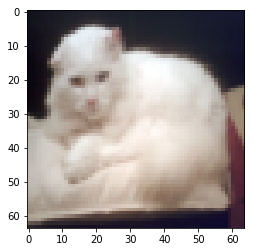

In [3]:
#view the dataset
c = 13
cat = train_set_x_orig[c]
print(plt.imshow(cat))
print(train_set_x_orig.shape)

AxesImage(54,36;334.8x217.44)


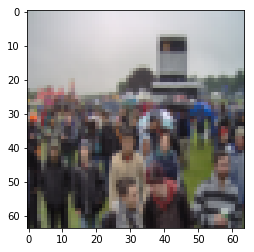

In [4]:
nc = 100
non_cat = train_set_x_orig[nc]
print(plt.imshow(non_cat))

In [290]:
#unroll the data from 64,64, 3 to (64 * 64 * 3), 1
X_train = train_set_x_orig.reshape(209,64 * 64 * 3)
X_test  = test_set_x_orig.reshape(50,64*64*3)

X_train = X_train.T
Y_train = train_set_y
X_test  = X_test.T

#normalize the data
X_train = X_train / (np.max(X_train, axis = 0))


X_test  = X_test / (np.max(X_test, axis = 0))
Y_test  = test_set_y
print(X_train.shape,Y_train.shape)

m = 64
feature = 12288
tf.reset_default_graph()

(12288, 209) (1, 209)


#### Create the placeholder for input and output 

In [728]:
X = tf.placeholder(tf.float32,shape = [feature,None], name = 'Input')
Y = tf.placeholder(tf.float32, shape = [1,None], name = 'Output')

deep_layer = 2
node_layer = [4, 1]

W1 = tf.Variable(tf.random_normal([4,feature], seed = 1)* .0001, tf.float32, name = 'Weight_layer_1')
b1 = tf.Variable(tf.random_normal([4,1], seed = 1)* .0001, tf.float32, name = 'bias_layer_1')

W2 = tf.Variable(tf.random_normal([4,4],seed = 1) * .01, tf.float32, name = 'Weigth_layer_2')
b2 = tf.Variable(tf.random_normal([4,1], seed = 1), tf.float32, name = 'bias_layer_2')

W3 = tf.Variable(tf.random_normal([4,4], seed = 2) * 1.0, tf.float32 , name = 'Weight_layer_3')
b3 = tf.Variable(tf.random_normal([4,1], seed = 2) , tf.float32, name = 'bias_layer_3')

W4 = tf.Variable(tf.random_normal([1,4], seed = 3) * 1.0, tf.float32 , name = 'Weight_layer_4')
b4 = tf.Variable(tf.random_normal([1,1], seed = 3) , tf.float32, name = 'bias_layer_4')

#### Calculate the forward and backward propagation

In [775]:
#Forward propagation
A0 = X

Z1 = tf.matmul(W1 , A0) + b1
A1 = tf.sigmoid(Z1)

Z2 = tf.matmul(W2, A1) +  b2
A2 = tf.sigmoid(Z2)

Z3 = tf.matmul(W3, A2) + b3
A3 = tf.sigmoid(Z3)

Z4 = tf.matmul(W4, A3) + b4
A4 = tf.sigmoid(Z4)

#Backward propagation

DZ4 = tf.subtract(A4, Y)
DW4 = tf.matmul(DZ4, tf.transpose(A3)) / (m)
DB4 = tf.reduce_sum(DZ4, axis = 1, keep_dims = True) / (m)

DA3 = tf.matmul(tf.transpose(W4), DZ4)
DZ3 = tf.multiply(DA3, A3 *(1 - A3)) 
DW3 = tf.matmul(DZ3, tf.transpose(A2)) / (m)
DB3 = tf.reduce_sum(DZ3, axis = 1, keep_dims = True) / (m)

DA2 = tf.matmul(tf.transpose(W3), DZ3 )
DZ2 = tf.multiply(DA2, A2 * (1 - A2))
DW2 = tf.matmul(DZ2, tf.transpose(A1)) / (m)
DB2 = tf.reduce_sum(DZ2, axis = 1, keep_dims = True) / (m)

DA1 = tf.matmul(tf.transpose(W2), DZ2)
DZ1 = tf.multiply(DA1, A1 * (1 - A1))
DW1 = tf.matmul(DZ1, tf.transpose(A0)) / (m)
DB1 = tf.reduce_sum(DZ1, axis = 1, keep_dims = True) / (m)

In [798]:
epoch = 150
batch_size = 16
batch_iteration = 12

learning_rate = tf.constant(.03, name = 'learning_rate')

iteration_cost = []
cost =tf.reduce_sum(Y * tf.log(A4) + (1 - Y) * tf.log(1 - A4)) * (-1)


assign_w1     = W1.assign_sub(learning_rate * DW1)

assign_b1     = b1.assign_sub(learning_rate * DB1)

assign_w2     = W2.assign_sub(learning_rate * DW2)

assign_b2     = b2.assign_sub(learning_rate * DB2)

assign_w3     = W3.assign_sub(learning_rate * DW3)

assign_b3     = b3.assign_sub(learning_rate * DB3)

assign_w4     = W4.assign_sub(learning_rate * DW4)

assign_b4     = b4.assign_sub(learning_rate * DB4)     

init = tf.global_variables_initializer()

#### Train our model 

In [799]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):  
        for j in range(batch_iteration):
            sess.run([assign_w4, assign_b4,assign_w3, assign_b3, assign_w2, assign_b2, assign_w1, assign_b1], {X:X_train[:,j*batch_size:(j+1)* batch_size], Y:Y_train[:,j*batch_size:(j+1)*batch_size]})
            iteration_cost.append(sess.run(cost, {X:X_train, Y:Y_train}))
        sess.run([assign_w4, assign_b4,assign_w3, assign_b3, assign_w2, assign_b2, assign_w1, assign_b1], {X:X_train[:,198:], Y:Y_train[:,198:]})
        iteration_cost.append(sess.run(cost, {X:X_train, Y:Y_train}))
        
    w_1 = W1.eval()
    b_1 = b1.eval()
    w_2 = W2.eval()
    b_2 = b2.eval()
    w_3 = W3.eval()
    b_3 = b3.eval()
    w_4 = W4.eval()
    b_4 = b4.eval()

KeyboardInterrupt: 

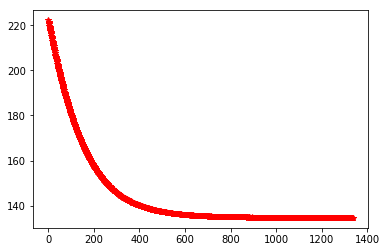

In [800]:
plt.plot(iteration_cost, 'r*')

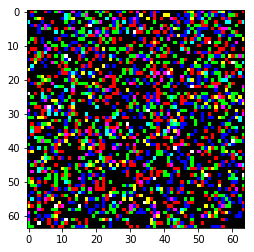

In [801]:
#visualize the value of W, it most look like cat
w_int = [int((i*10000) )for i in w_1[0,:]]
w_int = np.array(w_int,'uint8')

plt.imshow(w_int.reshape(64,64,3))

#visualize the value of W, it most look like cat
w_int = [int(i*2000) for i in w_1[1,:]]
w_int = np.array(w_int,'uint8')

plt.imshow(w_int.reshape(64,64,3))

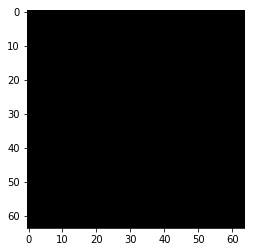

In [754]:
#visualize the value of W, it most look like cat
w_int = [int(i*950) for i in w_1[2,:]]
w_int = np.array(w_int,'uint8')

plt.imshow(w_int.reshape(64,64,3))

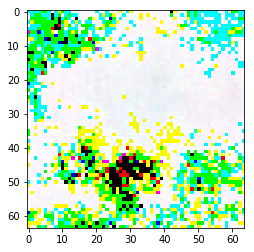

In [755]:
#visualize the value of W, it most look like cat
w_int = [int(i*25000) for i in w_1[3,:]]
w_int = np.array(w_int,'uint8')

plt.imshow(w_int.reshape(64,64,3))

In [720]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

a = np.array([-1, -0.5, 0, 0.5, 1])
sigmoid(a)
tanh(a)

array([-0.76159416, -0.46211716,  0.        ,  0.46211716,  0.76159416])

In [802]:
#Train accuracy
correct_no_train = 0
total_no_train = 0
for i in range(209):
    #Forward propagation
    A_0 = np.array(X_train[:,i]).reshape(12288,1)

    Z_1 = np.dot(w_1.reshape(4,12288) , A_0) + b_1
    A_1 = tanh(Z_1)

    Z_2 = np.dot(w_2, A_1) +  b_2
    A_2 = tanh(Z_2)
    
    Z_3 = np.dot(w_3, A_2) + b_3
    A_3 = tanh(Z_3)
    
    Z_4 = np.dot(w_4, A_3) + b_4
    A_4 = sigmoid(Z_4)
    if (np.abs(A_4 - Y_train[:,i]) < 0.5):
        correct_no_train += 1
    
    total_no_train += 1

print(correct_no_train / total_no_train)

0.3444976076555024


In [803]:
#Test accuracy
correct_no_test = 0
total_no_test = 0
for i in range(50):
    #Forward propagation
    A_0 = np.array(X_test[:,i]).reshape(12288,1)

    Z_1 = np.dot(w_1.reshape(4,12288) , A_0) + b_1
    A_1 = tanh(Z_1)

    Z_2 = np.dot(w_2, A_1) +  b_2
    A_2 = tanh(Z_2)
    
    Z_3 = np.dot(w_3, A_2) + b_3
    A_3 = tanh(Z_3)
    
    Z_4 = np.dot(w_4,A_3) + b_4
    A_4 = sigmoid(Z_4)
    
    if (np.abs(A_4 - Y_test[:,i]) < 0.5):
        correct_no_test += 1
    
    total_no_test += 1

print(correct_no_test / total_no_test)

0.66


In [804]:
np.min(iteration_cost)

134.59685

In [805]:
w_1[1,:]

array([  4.33099849e-05,   3.65289657e-06,   1.23096052e-05, ...,
         1.37717871e-04,   9.05774577e-05,   7.59042305e-05], dtype=float32)

In [764]:
w_1[2,:]

array([  1.96863752e-04,   1.37337105e-04,   1.74126646e-04, ...,
         8.88223149e-05,  -7.68167010e-05,   3.45690273e-06], dtype=float32)

In [765]:
w_1

array([[ -1.70536470e-04,  -1.04039151e-04,  -1.57854607e-04, ...,
         -1.87279424e-04,  -3.99444776e-04,  -4.23537458e-05],
       [ -8.16773972e-05,   1.87194266e-04,   5.19502682e-05, ...,
          3.29253497e-04,   5.48049109e-04,   1.29096050e-04],
       [  1.96863752e-04,   1.37337105e-04,   1.74126646e-04, ...,
          8.88223149e-05,  -7.68167010e-05,   3.45690273e-06],
       [  5.02697549e-05,  -2.70264631e-04,  -1.35425173e-04, ...,
         -1.76150585e-04,  -5.86060982e-04,  -1.73728360e-04]], dtype=float32)

In [766]:
w_4

array([[ 0.96432579, -1.10173476, -0.12012112,  0.42894274]], dtype=float32)

In [767]:
np.matmul(w_1, x_data) + b_1

ValueError: shapes (4,12288) and (2,4) not aligned: 12288 (dim 1) != 2 (dim 0)

In [769]:
iteration_cost

[217.53922,
 216.99185,
 216.37236,
 215.98135,
 215.21796,
 214.75758,
 214.52274,
 213.91696,
 213.61148,
 213.23296,
 212.93016,
 212.33293,
 211.66617,
 211.61101,
 211.61101,
 211.61101,
 211.07753,
 210.56447,
 210.05318,
 209.47215,
 209.11183,
 208.39175,
 207.96425,
 207.75462,
 207.1866,
 206.90865,
 206.56001,
 206.28455,
 205.72452,
 205.09738,
 205.04509,
 205.04509,
 205.04509,
 204.54134,
 204.06261,
 203.58549,
 203.04095,
 202.70961,
 202.03067,
 201.63443,
 201.44859,
 200.9164,
 200.66444,
 200.34424,
 200.09462,
 199.56999,
 198.98047,
 198.931,
 198.931,
 198.931,
 198.45563,
 198.00955,
 197.56494,
 197.0551,
 196.75128,
 196.11162,
 195.74507,
 195.58173,
 195.0838,
 194.85652,
 194.56319,
 194.33807,
 193.8472,
 193.29372,
 193.24695,
 193.24695,
 193.24695,
 192.79875,
 192.38374,
 191.97012,
 191.49355,
 191.21582,
 190.61383,
 190.27553,
 190.13339,
 189.66809,
 189.46414,
 189.19637,
 188.99443,
 188.53584,
 188.01688,
 187.97264,
 187.97264,
 187.97264,
 18

In [770]:
iteration_cost[1500]

134.62848

In [793]:
#Forward propagation
A_0 = X_train

Z_1 = np.dot(w_1 , A_0) + b_1
A_1 = tanh(Z_1)

Z_2 = np.dot(w_2, A_1) +  b_2
A_2 = tanh(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = tanh(Z_3)

Z_4 = np.dot(w_4, A_3) + b_4
A_4 = sigmoid(Z_4)


In [794]:
A_4

array([[ 0.60774712,  0.60770106,  0.607656  ,  0.60776158,  0.60775987,
         0.60775391,  0.60775637,  0.60773571,  0.60771969,  0.6077202 ,
         0.60767477,  0.60768656,  0.60771132,  0.60767496,  0.60768562,
         0.60765495,  0.60768439,  0.60764998,  0.60769253,  0.60776922,
         0.6076951 ,  0.6077543 ,  0.6076395 ,  0.60765152,  0.60767944,
         0.60778877,  0.60771547,  0.60770761,  0.60774465,  0.60771795,
         0.60777684,  0.60769835,  0.60770482,  0.60769495,  0.6077433 ,
         0.60774517,  0.60772451,  0.60763899,  0.60780681,  0.60770895,
         0.60772317,  0.60778781,  0.60770159,  0.60768535,  0.60771171,
         0.60774252,  0.60770691,  0.60771948,  0.60774093,  0.6076854 ,
         0.60764753,  0.60769543,  0.60769404,  0.60764489,  0.60774404,
         0.60766804,  0.6077136 ,  0.60763077,  0.60776484,  0.60774309,
         0.60772757,  0.60772109,  0.60769005,  0.60772968,  0.60763806,
         0.60775318,  0.60768106,  0.60771563,  0.6

In [774]:
Y_train

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [691]:
iteration_cost[-1]

164.43376